In [2]:
#import pytorch
import torch
from torch import nn

# import vision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#import matplot lib
import matplotlib.pyplot as plt

In [5]:
#getting a dataset (Fashion mnist)
train_data=datasets.FashionMNIST(root="data",
                                train=True,
                                download=True,
                                transform=torchvision.transforms.ToTensor(),
                                target_transform=None)
test_data=datasets.FashionMNIST(root='data',
                               train=False,
                               download=True,
                               transform=ToTensor(),
                               target_transform=None)

In [6]:
len(train_data),len(test_data)

(60000, 10000)

In [7]:
#ecxample
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [8]:
class_names= train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [10]:
# visualize image

(-0.5, 27.5, 27.5, -0.5)

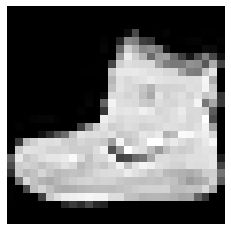

In [22]:
plt.imshow(image.squeeze(dim=0),cmap='gray')
plt.axis(False)

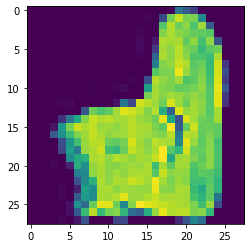

In [20]:
plt.imshow(torch.permute(image,(2,1,0)))

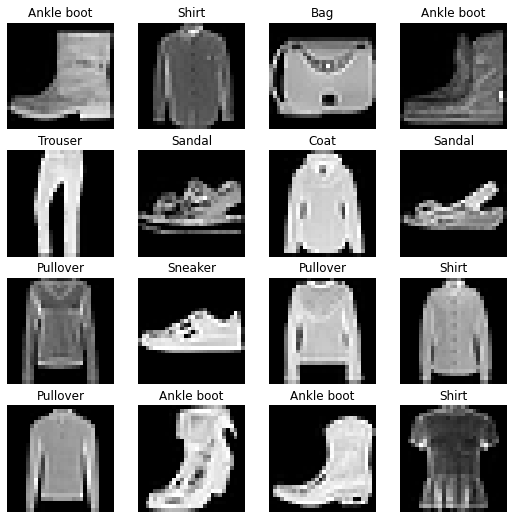

In [34]:
#plot more images
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
    random_idx=torch.randint(0,len(train_data),size=[1]).item()
    img,label=train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)
    

# dataloader
#daloader turns dataset into python iterables
# turns data into batches ( or mini-batches)
#why?
# computationally efficient, break 60000 images in 32 images batch sizes
#neural network more chances to update gradients per epoch


In [9]:
from torch.utils.data import DataLoader

#setup batchsize
BATCH_SIZE=32

#turn datasets into iterables
train_data_loader=DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)
test_data_loader=DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=False)

In [10]:
train_data_loader,test_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x1b6c357c8b0>,
 <torch.utils.data.dataloader.DataLoader at 0x1b6c357c310>)

In [11]:
#what is this?
train_data_loader.batch_size

32

In [12]:
#check what's inside the dataloader
train_features_batch, train_labels_batch=next(iter(train_data_loader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

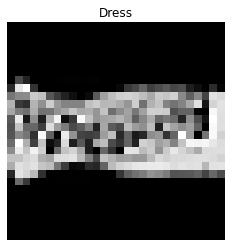

In [13]:
# show a sample from a data loader
torch.manual_seed(43)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(torch.permute(img,(2,1,0)),cmap='gray')
plt.title(class_names[label])
plt.axis(False)

In [57]:
# create a baseline model
from torch import nn
class Fashion(nn.Module):
    def __init__(self,
                intput_shape: int,
                hidden_units:int,
                output_shape:int):
        super(Fashion,self).__init__()
        self.layer_stack=nn.Sequential(nn.Flatten(),
                                      nn.Linear(in_features=intput_shape,out_features=hidden_units),
                                      nn.Linear(in_features=hidden_units,out_features=output_shape))
    def forward(self,x):
        return self.layer_stack(x)

In [128]:
torch.manual_seed(42)
model=Fashion(intput_shape=784,hidden_units=10, output_shape=len(class_names)).to("cpu")

In [61]:
model

Fashion(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [115]:
dummy_x=torch.rand((1,28,28))
model(dummy_x).argmax(dim=1)

tensor([8])

In [136]:
#training our model
#loss function and optimizer
loss_func=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)
#evaluation metrics
from torchmetrics import Accuracy 
accuracy=Accuracy()

# timer

In [100]:
# creating a function to time the experiments
from timeit import default_timer as timer

def print_train_time(start:float,
                    end:float,
                    device: torch.device=None):
    """prints difference between start and end time""" 
    total_time=end-start
    print(f" train time on {device}: {total_time:.3f} seconds")
    return total_time

In [138]:
start_time=timer()
#do something
for i in range(10000000):pass
end_time=timer()
print_train_time(start_time,end_time,device="cpu")

 train time on cpu: 0.387 seconds


0.3871777000022121

## training model
1. Lopp through epochsx
2. loop through training batches, perform training steps, calculate the train loss per batch
3. loop through testing batches, perform testing steps, calculate the test loss per batch
4. Display what happening
5. time


In [139]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_data_loader):
        model.train() 
        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss (per batch)
        loss = loss_func(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_data_loader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_data_loader)
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0 
    model.eval()
    with torch.inference_mode():
        for X, y in test_data_loader:
            # 1. Forward pass
            test_pred = model(X)
           
            # 2. Calculate loss (accumatively)
            test_loss += loss_func(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy(y, test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_data_loader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_data_loader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.90961 | Test loss: 0.62902, Test acc: 0.79%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.55733 | Test loss: 0.54409, Test acc: 0.81%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.50266 | Test loss: 0.51368, Test acc: 0.82%

 train time on cpu: 18.831 seconds


In [140]:
# make predicts

# function to evaluate the model

In [496]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_func: torch.nn.Module,
              accuracy_function):
    ''' Returns a dictionary containing the results of model predicting on dataloader'''
    loss,acc=0,0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred= model(X)
            #accumulate the loss and acc per batch
            loss+=loss_func(y_pred,y)
            acc+=accuracy_function(y,y_pred.argmax(dim=1))
            
        #scale loss and acc to find the average loss/accuracy per batch
        loss/=len(data_loader)
        acc/=len(data_loader)
        
    return {"model": model.__class__.__name__,
           "model_loss":loss.item(),
           "model_acc":torch.round(acc*100,decimals=2).item()}

In [497]:
#calcalate model 0 results on test data set
model_0_results=eval_model(model=model,data_loader=test_data_loader,loss_func=loss_func,accuracy_function=accuracy)

In [498]:
torch.round(torch.tensor([0.832223232312123*100]),decimals=2)

tensor([83.2200])

In [509]:
model_0_results

{'model': 'Fashion', 'model_loss': 0.5136751532554626, 'model_acc': 82.0}

In [500]:
# device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"

# non -linearity

In [401]:
class Fashion2(nn.Module):
    def __init__(self, input_shape: int,
                hidden_units: int,
                output_shape: int):
        super(Fashion2,self).__init__()
        self.layer_stack=nn.Sequential(nn.Flatten(),
                                      nn.Linear(in_features=input_shape,out_features=hidden_units),
                                      nn.ReLU(),
                                      nn.Linear(in_features=hidden_units,out_features=output_shape),
                                      nn.ReLU())
    def forward(self,x: torch.Tensor):
        return self.layer_stack(x)

In [402]:
torch.manual_seed(42)
model_1=Fashion2(input_shape=28*28, hidden_units=32, output_shape=10).to(device)

In [403]:
#loss function 
loss_func=torch.nn.CrossEntropyLoss()
#accuracy
from torchmetrics import Accuracy
accuracy=Accuracy()
#optimizer
optimizer=torch.optim.SGD(model_1.parameters(),lr=0.01)

In [104]:
# functioon for training and evaluation
# training loop
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_func: torch.nn.CrossEntropyLoss,
               optimizer: torch.optim.Optimizer,
              accuracy,
              device: torch.device=device):
    
    
    train_loss,train_acc=0,0
    model.train()
    for batch, (X , y) in enumerate(data_loader):
        X,y=X.to(device),y.to(device)
        y_pred=model(X)
        loss=loss_func(y_pred,y)
        train_loss+=loss
        train_acc+=accuracy(y_pred.argmax(dim=1),y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 400 ==0:
            print(f"Looked at {batch*len(X)} / {len(data_loader.dataset)} samples")
    
    train_loss/=len(data_loader)
    train_acc/=len(data_loader)
    print(f"Train Loss: {train_loss:.5f} | Train acc: {train_acc:.2f}% ")
                            

In [105]:
# testing loop
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_func: torch.nn.Module,
              accuracy,
              device: torch.device=device):
    test_loss,test_acc=0,0
    model.eval()
    with torch.inference_mode():
        for  X , y in data_loader:
            X,y=X.to(device),y.to(device)
            y_pred=model(X)
            loss=loss_func(y_pred,y)
            test_loss+=loss
            test_acc+=accuracy(y_pred.argmax(dim=1),y)
            

        test_loss/=len(data_loader)
        test_acc/=len(data_loader)
        print(f"Test Loss: {test_loss:.5f} | Test acc: {test_acc:.2f}% \n")

In [406]:
torch.manual_seed(42)

#measure time
from timeit import default_timer as timer
start_time=timer()

epoches =5
for epoch in tqdm(range(epoches)):
    train_step(model=model_1,
              data_loader=train_data_loader,
               loss_func=loss_func,
              optimizer=optimizer,
              accuracy=accuracy,
              device=device)
    
    test_step(model=model_1,
              data_loader=test_data_loader,
               loss_func=loss_func,
              accuracy=accuracy,
              device=device)
    
stop_time=timer()
train_time=print_train_time(start=start_time,end=stop_time,device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train Loss: 1.12438 | Train acc: 0.63% 
Test Loss: 0.67763 | Test acc: 0.76% 

Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train Loss: 0.59288 | Train acc: 0.80% 
Test Loss: 0.56371 | Test acc: 0.80% 

Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train Loss: 0.51763 | Train acc: 0.82% 
Test Loss: 0.52325 | Test acc: 0.82% 

Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train Loss: 0.48267 | Train acc: 0.83% 
Test Loss: 0.49650 | Test acc: 0.83% 

Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples


In [501]:
model_1_results=eval_model(model_1,
                          data_loader=test_data_loader,
                          loss_func=loss_func,
                          accuracy_function=accuracy)

In [502]:
model_1_results

{'model': 'Fashion2',
 'model_loss': 0.48334094882011414,
 'model_acc': 83.12000274658203}

In [503]:
model_0_results

{'model': 'Fashion', 'model_loss': 0.5136751532554626, 'model_acc': 82.0}

# CNN

In [81]:
class Fashion3(nn.Module):
    def __init__(self, 
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super(Fashion3,self).__init__()
        
        self.conv_block_1=nn.Sequential(nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=(3,3),stride=(1,1),padding=(1,1)),
                                       nn.ReLU(),
                                       nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1,padding=1),
                                       nn.ReLU(),
                                       nn.MaxPool2d(kernel_size=2))
        self.conv_block_2=nn.Sequential(nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3,stride=1,padding=1),
                                       nn.ReLU(),
                                       nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3, stride=1,padding=1),
                                       nn.ReLU(),
                                       nn.MaxPool2d(kernel_size=2))
        self.classifier=nn.Sequential(nn.Flatten(start_dim=1, end_dim=-1),
                                     nn.Linear(in_features=hidden_units*7*7,out_features=output_shape))
        
    def forward(self,x: torch.Tensor):
        x=self.conv_block_1(x)
        #print(x.shape)
        x=self.conv_block_2(x)
        #print(x.shape)
        x=self.classifier(x)
        #print(x.shape)
        return x

In [82]:
torch.manual_seed(42)
model_2=Fashion3(input_shape=1, output_shape=len(class_names),hidden_units=10).to(device)

In [83]:
model_2

Fashion3(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [84]:
next(model_2.parameters()).device

device(type='cpu')

torch.Size([1, 28, 28])


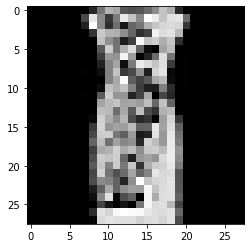

In [85]:
print(img.shape)
plt.imshow(img.squeeze(),cmap='gray')

In [86]:
model_2(img.unsqueeze(dim=0))

tensor([[ 0.0372, -0.0650,  0.0433, -0.0317, -0.0012,  0.0186,  0.0010, -0.0156,
          0.0295,  0.0047]], grad_fn=<AddmmBackward0>)

In [87]:
class_names[model_2(img.unsqueeze(dim=1)).argmax()]

'Pullover'

## example of nn.Conv2d

In [88]:
torch.manual_seed(42)
# create a bactch of image
image=torch.randn(size=(32,3,64,64))
test_image=image[0]

In [89]:
print(f"Image batch shape: {image.shape}")
print(f"Single image shape:{test_image.shape}")
print(f"Test image: \n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape:torch.Size([3, 64, 64])
Test image: 
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [90]:
#single conv2D layer
conv_layer=nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3,stride=1, padding=0)

#pass the data to conv layer
conv_out=conv_layer(test_image)

In [91]:
conv_out.shape

torch.Size([10, 62, 62])

## example of nn.Maxpool2d

In [92]:
test_image.shape

torch.Size([3, 64, 64])

In [93]:
# sample nn.Maxpool layer
max_pool=nn.MaxPool2d(kernel_size=2)

In [94]:
test_conv=conv_layer(test_image)
print(F" convshape out {test_conv.shape}")

 convshape out torch.Size([10, 62, 62])


In [95]:
test_max_pool=max_pool(test_conv)
print(F" max pool out {test_max_pool.shape}")

 max pool out torch.Size([10, 31, 31])


## trick for finding the shape of the linear layer input

use the multiplication

training model_2 with loss function and optimizer

In [101]:
torch.manual_seed(42)
model_2=Fashion3(input_shape=1, output_shape=len(class_names),hidden_units=10).to(device)

In [102]:
loss_func=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model_2.parameters(),lr=0.1)
from torchmetrics import Accuracy
accuracy=Accuracy()

In [106]:
torch.manual_seed(42)
from timeit import default_timer as timer
from tqdm.auto import tqdm
start_time_model_2= timer()
epoches=5
for epoch in tqdm(range(epoches)):
    print(f"Epoch : {epoch} ---------- \n")
    train_step(model=model_2,data_loader=train_data_loader,loss_func=loss_func,device=device,optimizer=optimizer,accuracy=accuracy)
    test_step(model=model_2,data_loader=test_data_loader,loss_func=loss_func,accuracy=accuracy,device=device)

end_time_model_2=timer()
print_train_time(start=start_time_model_2,end=end_time_model_2,device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch : 0 ---------- 

Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train Loss: 0.59141 | Train acc: 0.79% 
Test Loss: 0.39140 | Test acc: 0.86% 

Epoch : 1 ---------- 

Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train Loss: 0.36051 | Train acc: 0.87% 
Test Loss: 0.34918 | Test acc: 0.87% 

Epoch : 2 ---------- 

Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train Loss: 0.32266 | Train acc: 0.88% 
Test Loss: 0.32057 | Test acc: 0.88% 

Epoch : 3 ---------- 

Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train Loss: 0.30041 | Train acc: 0.89% 
Test Lo

151.97555809999994

In [421]:
model_2.__class__.__name__

'Fashion3'

In [507]:
model_2_results=eval_model(model_2,data_loader=test_data_loader,accuracy_function=accuracy,loss_func=loss_func)

In [515]:
model_2_results

{'model': 'Fashion3',
 'model_loss': 0.3096836805343628,
 'model_acc': 89.08999633789062}

In [513]:
model_0_results

{'model': 'Fashion', 'model_loss': 0.5136751532554626, 'model_acc': 82.0}

In [512]:
model_1_results

{'model': 'Fashion2',
 'model_loss': 0.48334094882011414,
 'model_acc': 83.12000274658203}

#  comparison results of different models

In [429]:
import pandas as pd


In [510]:
compare_results=pd.DataFrame([model_0_results,
                             model_1_results,
                             model_2_results])

In [511]:
compare_results

,model,model_loss,model_acc
0,Fashion,0.513675,82.000000
1,Fashion2,0.483341,83.120003
2,Fashion3,0.309684,89.089996


#  model prediction 

In [565]:
def make_predictions(model: torch.nn.Module,
                    data: list,
                    device: torch.device=device):
    pred_probs=[]
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            #prepare the sample
            sample=torch.unsqueeze(sample,dim=0).to(device)
            pred_logit=model(sample)
            #print(pred_logit.squeeze())
            pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)
            # to cpu
            pred_probs.append(pred_prob.cpu())
    # stack the pred_prob to turn list in tensor
        return torch.stack(pred_probs)

In [566]:
len(list(test_data))

10000

# random sampling ffrom the test data

In [592]:
import random

test_samples=[]
test_labels=[]

for sample,label in random.sample(list(test_data),k=9):
        test_samples.append(sample)
        test_labels.append(label)
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Ankle boot')

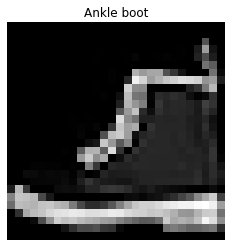

In [593]:
plt.imshow(test_samples[0].squeeze(dim=0),cmap='gray')
plt.axis(False)
plt.title(class_names[test_labels[0]])

In [594]:
# make prediction
pred_probs= make_predictions(model=model_2,data=test_samples)
pred_probs[:2]

tensor([[3.6943e-06, 7.4368e-08, 9.1827e-07, 1.1513e-05, 2.6157e-07, 1.3169e-02,
         5.9600e-07, 2.3839e-02, 1.5858e-03, 9.6139e-01],
        [7.0975e-05, 6.9106e-07, 2.3124e-05, 2.7764e-06, 4.2070e-07, 4.9076e-04,
         5.1754e-06, 9.3794e-01, 3.7439e-04, 6.1095e-02]])

In [595]:
#predicition prob to labes
pred_classes=pred_probs.argmax(dim=1)

In [596]:
pred_classes

tensor([9, 7, 2, 0, 1, 0, 3, 5, 4])

In [597]:
test_labels

[9, 7, 2, 0, 1, 0, 4, 5, 4]

# plot the sample prediction and ground truth

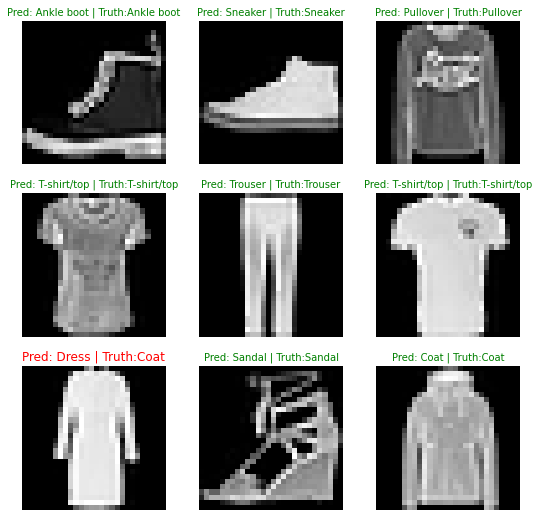

In [602]:
#plot predictions
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i, sample in enumerate(test_samples):
    # create a subplot
    plt.subplot(nrows,ncols,i+1)
    
    #plot the target image
    plt.imshow(sample.squeeze(), cmap='gray')
    
    #find the predicton
    pred_label=class_names[pred_classes[i]]
    #get the truth label
    truth_label=class_names[test_labels[i]]
    
    # create a title
    title_text=f"Pred: {pred_label} | Truth:{truth_label}"
    
    #check for quality 
    if pred_label== truth_label:
        plt.title(title_text, fontsize=10, c='g')
    else:
        plt.title(title_text, fontsize=12, c='r')
    plt.axis(False)

## making a confusion matrix for further classification matrix

In [604]:
from torchmetrics import ConfusionMatrix

In [605]:
# mltextend for confusion matrix

In [609]:
from mlxtend.plotting import plot_confusion_matrix

In [610]:
from tqdm.auto import tqdm

In [626]:
y_preds=[]
model_2.eval()
with torch.inference_mode():
    for X,y in tqdm(test_data_loader, desc="Making predections....."):
        # send data to the device
        X,y= X.to(device),y.to(device)
        # calculating the logits
        y_pred_logits=model_2(X)
        # turn logits to prrob and to labesl
        #print(y_pred_logits)
        y_pred=torch.softmax(y_pred_logits.squeeze(),dim=0).argmax(dim=1)
        # put on cpu
        #print(y_pred.shape)
        y_preds.append(y_pred.cpu())
# concatinate list of predictions into a tensor
#print(y_preds)
y_pred_tensor=torch.cat(y_preds)
y_pred_tensor[:10]

Making predections.....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

# handling the libraries

In [640]:
# handling the libraries
try:
    import torchmetrics,mlxtend
    print(f"mlxtend verison: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1])>=19, "mlxtend should be greater than 0.19"           
except:
    !pip install torchmetrics mlxtend

mlxtend verison: 0.21.0


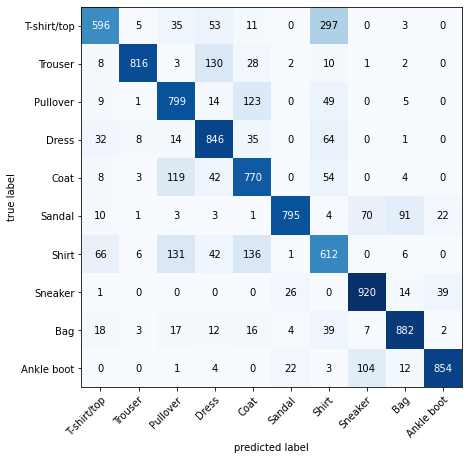

In [643]:
# confusion matrix instance and compare predictions to targegest
conf_mat=ConfusionMatrix(num_classes=len(class_names))
conf_mat_tensor=conf_mat(preds=y_pred_tensor,target=test_data.targets)
# plot the mlxtend
fig,ax=plot_confusion_matrix(conf_mat=conf_mat_tensor.numpy(),class_names=class_names,figsize=(10,7))

In [642]:
conf_mat_tensor

tensor([[596,   5,  35,  53,  11,   0, 297,   0,   3,   0],
        [  8, 816,   3, 130,  28,   2,  10,   1,   2,   0],
        [  9,   1, 799,  14, 123,   0,  49,   0,   5,   0],
        [ 32,   8,  14, 846,  35,   0,  64,   0,   1,   0],
        [  8,   3, 119,  42, 770,   0,  54,   0,   4,   0],
        [ 10,   1,   3,   3,   1, 795,   4,  70,  91,  22],
        [ 66,   6, 131,  42, 136,   1, 612,   0,   6,   0],
        [  1,   0,   0,   0,   0,  26,   0, 920,  14,  39],
        [ 18,   3,  17,  12,  16,   4,  39,   7, 882,   2],
        [  0,   0,   1,   4,   0,  22,   3, 104,  12, 854]])

# saving and loading the best model

In [16]:
from pathlib import Path
# create model directory path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,
                exist_ok=True)

#create model save
MODEL_NAME="vision_model.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH

WindowsPath('models/vision_model.pth')

In [645]:
# save the model state dict
print(f"Saving the model to  {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),f=MODEL_SAVE_PATH)

Saving the model to  models\vision_model.pth


In [107]:
# loading the pth model
#create a instance of the fashion
torch.manual_seed(42)
model=Fashion3(input_shape=1,hidden_units=10, output_shape=len(class_names))

In [108]:
#load model
model.load_state_dict(torch.load(f=str(MODEL_SAVE_PATH)))
#send model to device
device="cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

Fashion3(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [109]:
# evaluate the loaded model
import random
random.seed(42)
test_samples=[]
test_labels=[]
for sample, label in random.sample(list(test_data),k=9):
    test_samples.append(sample)
    test_labels.append(label)

In [110]:
# repeated make prediction function
def make_prediction(model: torch.nn.Module,data: list, device: torch.device=device):
    pred_probs=[]
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # prepare sample:
            #print(sample.shape)
            sample=torch.unsqueeze(sample, dim=0).to(device)
            #print(sample.shape)
            # forward pass
            pred_logits=model(sample)
            #print("logits",pred_logits)
            # get the prediction prob 
            pred_prob=torch.softmax(pred_logits.squeeze(),dim=0)
            #get pred prob off the gpu
            pred_probs.append(pred_prob.cpu())
            #print("prob",pred_prob)
    
    # stacked pred to turn into tensor
    return torch.stack(pred_probs)

In [111]:
data_samp=torch.rand(size=(1,1,28,28))

In [112]:
data_samp.shape

torch.Size([1, 1, 28, 28])

In [113]:
make_prediction(model=model,data=data_samp,device=device)

tensor([[6.5957e-03, 1.5047e-02, 1.9150e-02, 6.6112e-03, 1.2294e-03, 1.1258e-04,
         8.0184e-02, 8.6653e-04, 8.6905e-01, 1.1518e-03]])

In [129]:
# repeated evaluation fuction of model
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_func: torch.nn.Module,
              accuracy,
              device: torch.device=device):
    loss,acc=0,0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            # send data to targets
            X,y=X.to(device),y.to(device)
            y_pred=model(X)
            loss+=loss_func(y_pred,y)
            acc+=accuracy(y_pred,y)
            #print(acc)
        #scale loss and accuracy per batch
        loss/=len(data_loader)
        acc/=len(data_loader)
        #print(acc)
    return {
        "model": model.__class__.__name__,
        "model_loss": loss.item(),
        "model_accuracy": torch.round(acc*100,decimals=2).item()
    }

In [130]:
loss_func=torch.nn.CrossEntropyLoss()
from torchmetrics import Accuracy
accuracy=Accuracy()

In [131]:
loade_model_result=eval_model(model=model,data_loader=test_data_loader,loss_func=loss_func,accuracy=accuracy,device=device)
print(loade_model_result)

{'model': 'Fashion3', 'model_loss': 0.3096836805343628, 'model_accuracy': 89.08999633789062}
